### All the visualization are related with the Business and analytical questions of this project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import kaleido


In [2]:
df=pd.read_csv('Merge_Data/Clean_data.csv')
df

,Hour,DayOfWeek,BuiltUpArea,CollisionType,LightCondition,RoadType,Municipality,District,Province,Region,Accident,AccidentsWithFatalities,AccidentsWithFatalities30Days,AccidentsWithMinorInjuries,AccidentsWithSeriousInjuries,AccidentsWithSlightInjuries,Year,Month,Day_of_Month
0,18,vrijdag,Buiten bebouwde kom,Tegen een hindernis buiten de rijbaan,"Nacht, ontstoken openbare verlichting","Gewestweg, provincieweg of gemeenteweg",Aartselaar,Arrondissement Antwerpen,Provincie Antwerpen,Vlaams Gewest,1,0,0,0,0,1,2019,11,29
1,18,woensdag,Buiten bebouwde kom,Niet beschikbaar,"Nacht, ontstoken openbare verlichting","Gewestweg, provincieweg of gemeenteweg",Aartselaar,Arrondissement Antwerpen,Provincie Antwerpen,Vlaams Gewest,1,0,0,0,0,1,2019,12,11
2,13,maandag,Niet beschikbaar,Met een voetganger,Bij klaarlichte dag,"Gewestweg, provincieweg of gemeenteweg",Aartselaar,Arrondissement Antwerpen,Provincie Antwerpen,Vlaams Gewest,1,0,0,0,0,1,2019,12,30
3,14,zondag,Binnen bebouwde kom,Langs opzij,Bij klaarlichte dag,"Gewestweg, provincieweg of gemeenteweg",Aartselaar,Arrondissement Antwerpen,Provincie Antwerpen,Vlaams Gewest,1,0,0,0,0,1,2019,12,15
4,9,woensdag,Binnen bebouwde kom,Frontale botsing (of bij het kruisen),Bij klaarlichte dag,"Gewestweg, provincieweg of gemeenteweg",Aartselaar,Arrondissement Antwerpen,Provincie Antwerpen,Vlaams Gewest,1,0,0,0,0,1,2019,11,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176272,17,donderdag,Buiten bebouwde kom,"Eén bestuurder, geen hindernis",Bij klaarlichte dag,"Gewestweg, provincieweg of gemeenteweg",Pelt,Arrondissement Maaseik,Provincie Limburg,Vlaams Gewest,1,0,0,0,0,1,2023,6,22
176273,23,woensdag,Buiten bebouwde kom,Tegen een hindernis buiten de rijbaan,"Nacht, ontstoken openbare verlichting","Gewestweg, provincieweg of gemeenteweg",Pelt,Arrondissement Maaseik,Provincie Limburg,Vlaams Gewest,1,0,0,0,0,1,2023,6,21
176274,14,maandag,Binnen bebouwde kom,Langs opzij,Bij klaarlichte dag,"Gewestweg, provincieweg of gemeenteweg",Pelt,Arrondissement Maaseik,Provincie Limburg,Vlaams Gewest,1,0,0,0,0,1,2023,6,19
176275,18,maandag,Buiten bebouwde kom,Niet beschikbaar,Bij klaarlichte dag,"Gewestweg, provincieweg of gemeenteweg",Pelt,Arrondissement Maaseik,Provincie Limburg,Vlaams Gewest,1,0,0,0,0,1,2023,6,19


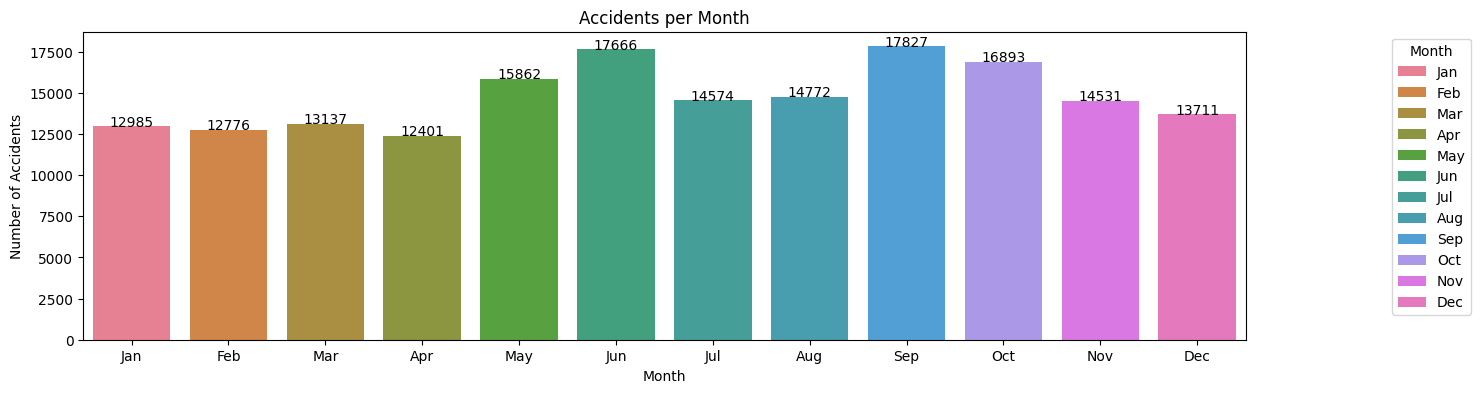

In [3]:
# Accidents per Year using Plotly..
accidents_per_year = df.groupby('Year')[['Accident']].sum()
fig=px.bar(accidents_per_year, x=accidents_per_year.index, y='Accident', title='Accidents per Year', 
           labels={'x':'Year', 'y':'Number of Accidents'},color=accidents_per_year.index)
fig.update_traces(textposition='outside') 
fig.write_html('Accidents_per_Year.html')
fig.show()

# Accidents per month using seaborn...
fig,ax=plt.subplots(figsize=(15,4))
accidents_per_month = df.groupby('Month')[['Accident']].sum()
accidents_per_month = accidents_per_month.reset_index()
accidents_per_month['Month'] = pd.to_datetime(accidents_per_month['Month'], format='%m').dt.month_name().str.slice(stop=3)
sns.barplot(data=accidents_per_month, x='Month', y='Accident',hue='Month',legend=True)
for i in range(len(accidents_per_month)):
    plt.text(i, accidents_per_month['Accident'][i], accidents_per_month['Accident'][i], ha = 'center')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.legend(title='Month',loc='upper right',bbox_to_anchor=(1.2, 1))
plt.show()


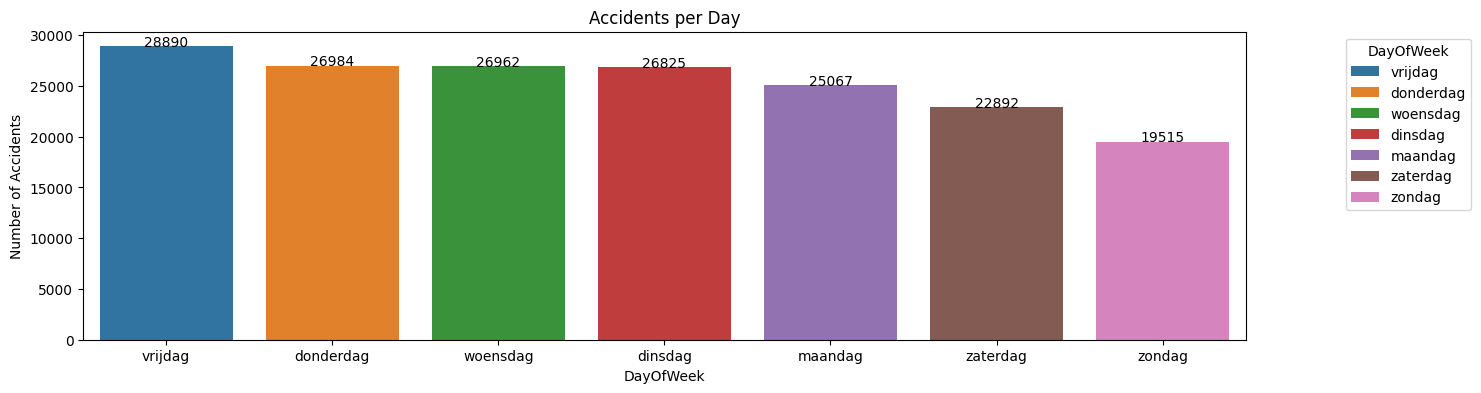

In [4]:
# Accidents per month using Plotly...for each year
accidents_per_month = df.groupby(['Year','Month'])[['Accident']].sum()
accidents_per_month = accidents_per_month.reset_index()
accidents_per_month['Month'] = pd.to_datetime(accidents_per_month['Month'], format='%m').dt.month_name().str.slice(stop=3)
fig=px.line(accidents_per_month, x='Month', y='Accident', title='Accidents per Month', color='Year', 
        labels={'Month':'Month', 'Accident':'Number of Accidents', 'Year':'Year'},line_group='Year',markers=True)
fig.write_html('Accidents_per_month.html')
fig.show()

# Accidents per day of the week
fig,ax=plt.subplots(figsize=(15,4))
accidents_per_day = df.groupby('DayOfWeek')[['Accident']].sum()
accidents_per_day = accidents_per_day.sort_values(by='Accident',ascending=False).reset_index()
sns.barplot(data=accidents_per_day, x='DayOfWeek', y='Accident',hue='DayOfWeek',legend=True)
for i in range(len(accidents_per_day)):
    plt.text(i, accidents_per_day['Accident'][i], accidents_per_day['Accident'][i], ha = 'center')
plt.title('Accidents per Day')
plt.xlabel('DayOfWeek')
plt.ylabel('Number of Accidents')
plt.legend(title='DayOfWeek',loc='upper right',bbox_to_anchor=(1.2, 1))
plt.show()

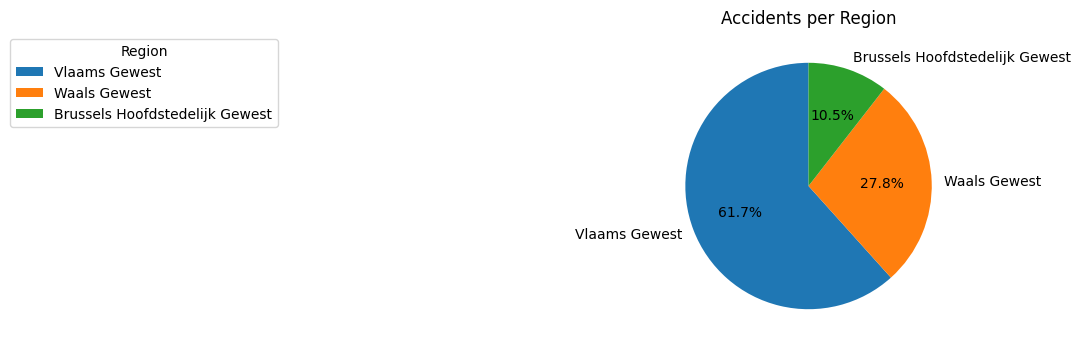

In [5]:
# Now its time to check per region
fig,ax=plt.subplots(figsize=(10,4))
accidents_per_region = df.groupby('Region')[['Accident']].sum()
accidents_per_region = accidents_per_region.sort_values(by='Accident',ascending=False).reset_index()

ax.pie(accidents_per_region['Accident'], labels=accidents_per_region['Region'], autopct='%1.1f%%', startangle=90)
ax.set_title('Accidents per Region')
# set legent outside the plot
plt.legend(title='Region',loc='upper right',bbox_to_anchor=(-1.2, 1))
plt.show()

# Grouping accidents per region and year
accidents_per_region = df.groupby(['Year', 'Region'])[['Accident']].sum()
accidents_per_region = accidents_per_region.reset_index()
fig=px.line(accidents_per_region, x='Year', y='Accident', title='Accidents per Region by Year', color='Region', 
        labels={'Year':'Year', 'Accident':'Number of Accidents', 'Region':'Region'},line_group='Region',markers=True, facet_col='Region')
fig.write_html('Accidents_per_Region_by_Year.html')
fig.show()

In [16]:
# Grouping accidents per region and month
accidents_per_region = df.groupby(['Month', 'Region'])[['Accident']].sum()
accidents_per_region = accidents_per_region.reset_index()
accidents_per_region['Month'] = pd.to_datetime(accidents_per_region['Month'], format='%m').dt.month_name().str.slice(stop=3)
fig=px.line(accidents_per_region, x='Month', y='Accident', title='Accidents per Region by Month', color='Region', 
        labels={'Month':'Month', 'Accident':'Number of Accidents', 'Region':'Region'},line_group='Region',markers=True)
fig.write_html('Accidents_per_Region_by_Month.html')
fig.show()


C:\Users\bhusa\AppData\Local\Temp\ipykernel_28212\2846737637.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



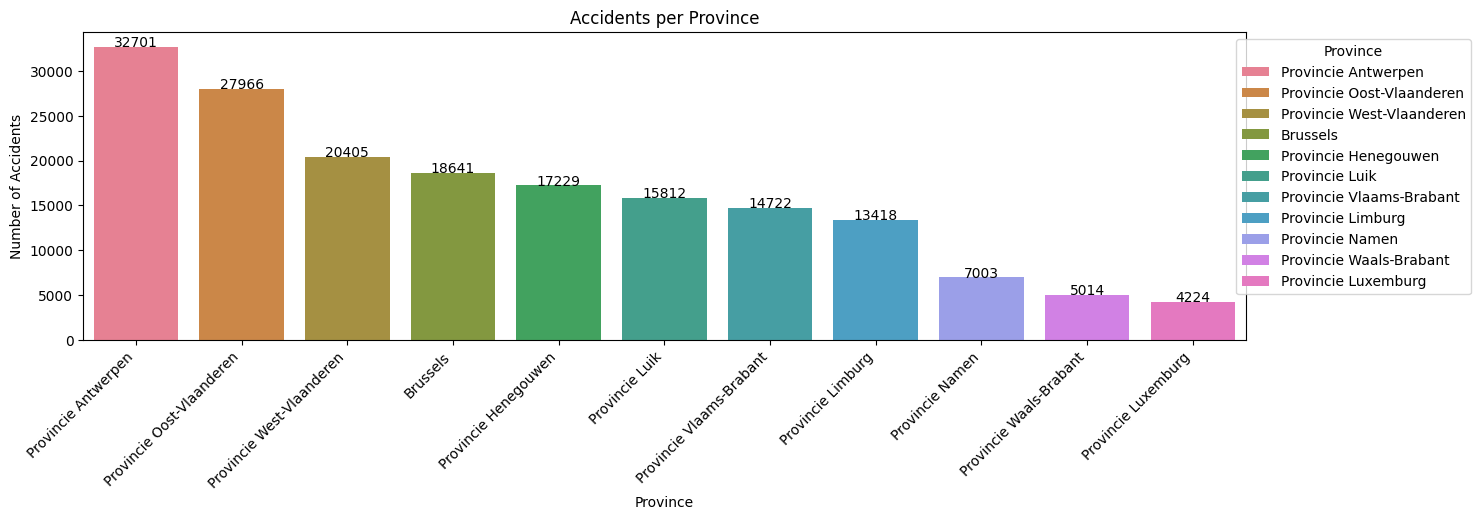

In [ ]:
# lets move one step deeper to do analysis by province
fig,ax=plt.subplots(figsize=(15,4))
accidents_per_province = df.groupby('Province')[['Accident']].sum()
accidents_per_province = accidents_per_province.sort_values(by='Accident',ascending=False).reset_index()
sns.barplot(data=accidents_per_province, x='Province', y='Accident',hue='Province',legend=True)
for i in range(len(accidents_per_province)):
    plt.text(i, accidents_per_province['Accident'][i], accidents_per_province['Accident'][i], ha = 'center')
plt.title('Accidents per Province')
plt.xlabel('Province')
plt.ylabel('Number of Accidents')
plt.legend(title='Province',loc='upper right',bbox_to_anchor=(1.2, 1))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Grouping accidents per province and year
accidents_per_province = df.groupby(['Year', 'Province'])[['Accident']].sum()
accidents_per_province = accidents_per_province.reset_index()
fig=px.line(accidents_per_province, x='Year', y='Accident', title='Accidents per Province by Year', color='Province', 
        labels={'Year':'Year', 'Accident':'Number of Accidents', 'Province':'Province'},line_group='Province',markers=True)
fig.write_html('Accidents_per_Province_by_Year.html')
fig.show()




C:\Users\bhusa\AppData\Local\Temp\ipykernel_28212\2202141201.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



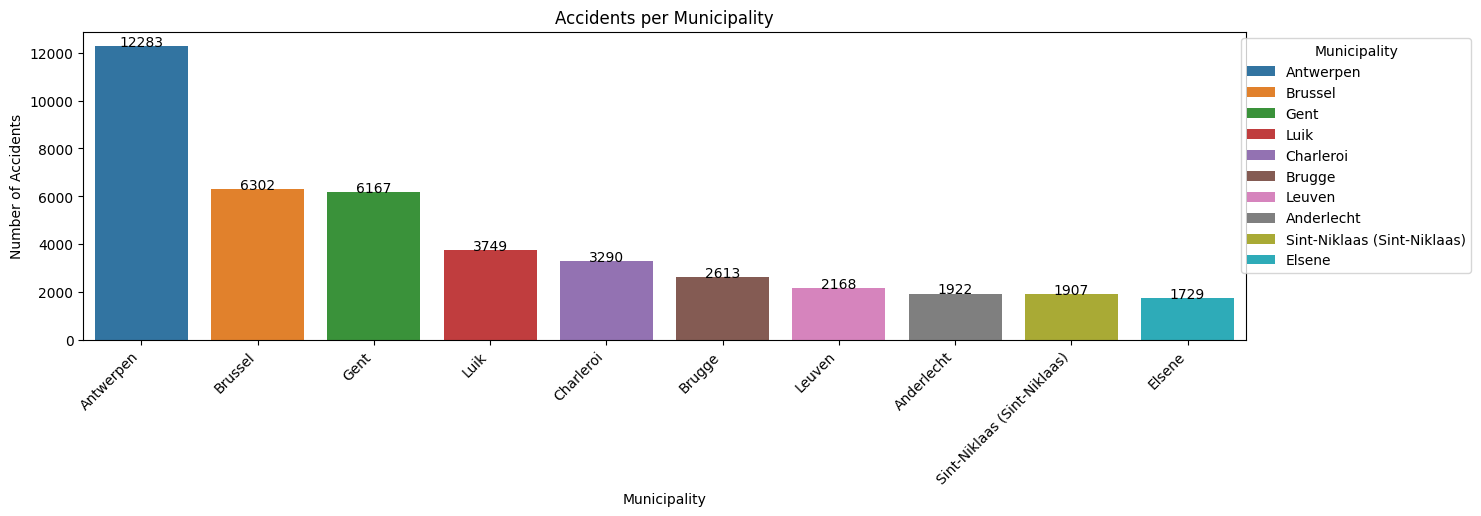

In [8]:
# To 10 municipalities with most accidents by year
fig,ax=plt.subplots(figsize=(15,4))
accidents_per_municipality = df.groupby('Municipality')[['Accident']].sum()
accidents_per_municipality = accidents_per_municipality.sort_values(by='Accident',ascending=False).head(10).reset_index()
sns.barplot(data=accidents_per_municipality, x='Municipality', y='Accident',hue='Municipality',legend=True)
for i in range(len(accidents_per_municipality)):
    plt.text(i, accidents_per_municipality['Accident'][i], accidents_per_municipality['Accident'][i], ha = 'center')
plt.title('Accidents per Municipality')
plt.xlabel('Municipality')
plt.ylabel('Number of Accidents')
plt.legend(title='Municipality',loc='upper right',bbox_to_anchor=(1.2, 1))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Showing data by district
accidents_per_district = df.groupby('District')[['Accident']].sum()
accidents_per_district = accidents_per_district.sort_values(by='Accident',ascending=False).reset_index()
accidents_per_district=accidents_per_district.head(20)
fig=px.bar(accidents_per_district, x='District', y='Accident', title='Accidents per District',
         labels={'District':'District', 'Accident':'Number of Accidents'},color='District')
fig.write_html('Accidents_per_District.html')
fig.show()





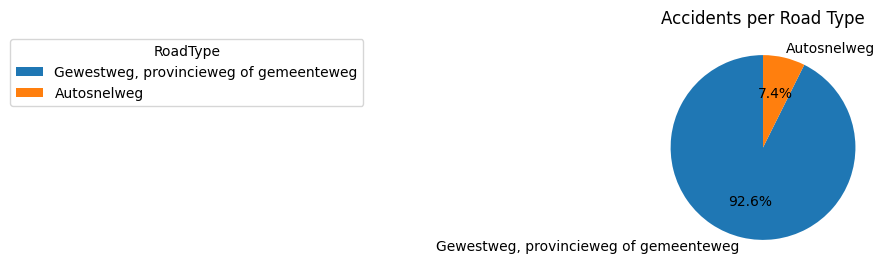

In [17]:
# Road type analysis
fig,ax=plt.subplots(figsize=(6,3))
filter_df = df[df['RoadType']!='Onbekend']
accidents_per_road = filter_df.groupby('RoadType')[['Accident']].sum()
accidents_per_road = accidents_per_road.sort_values(by='Accident',ascending=False).reset_index()
ax.pie(accidents_per_road['Accident'], labels=accidents_per_road['RoadType'], autopct='%1.1f%%', startangle=90)
ax.set_title('Accidents per Road Type')
plt.legend(title='RoadType',loc='upper right',bbox_to_anchor=(-1.2, 1))
plt.show()

# Road type analysis by year
accidents_per_road = filter_df.groupby(['Year','RoadType'])[['Accident']].sum()
accidents_per_road = accidents_per_road.reset_index()
fig=px.line(accidents_per_road, x='Year', y='Accident', title='Accidents per Road Type by Year', color='RoadType', 
        labels={'Year':'Year', 'Accident':'Number of Accidents', 'RoadType':'RoadType'},line_group='RoadType',markers=True, facet_col='RoadType')
fig.write_html('Accidents_per_RoadType_by_Year.html')

fig.show()



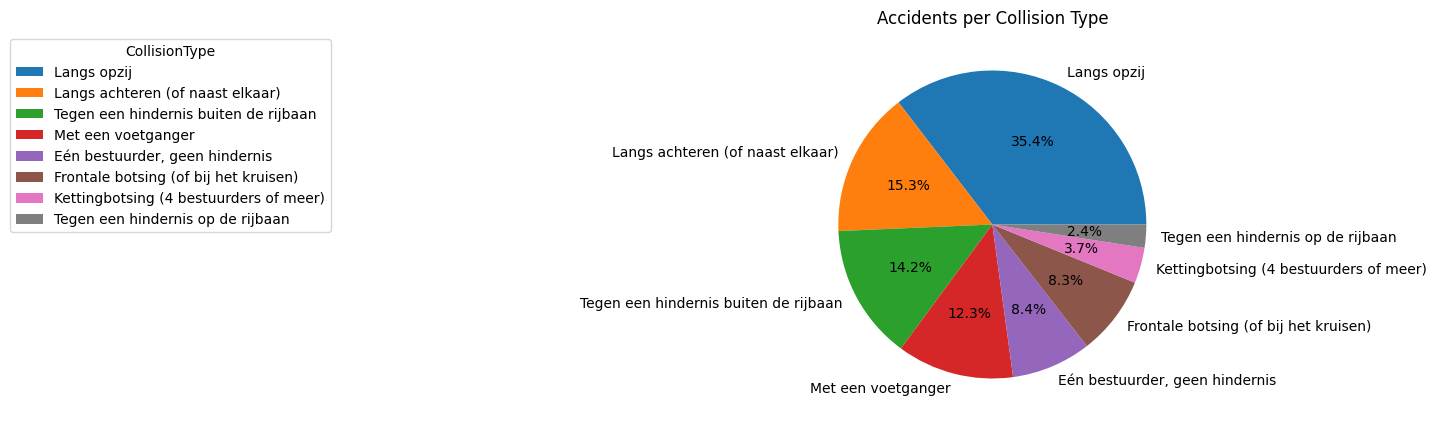

In [23]:
# Collision type analysis
fig,ax=plt.subplots(figsize=(15,5))
filter_df = df[df['CollisionType']!='Niet beschikbaar']
accidents_per_collision = filter_df.groupby('CollisionType')[['Accident']].sum()
accidents_per_collision = accidents_per_collision.sort_values(by='Accident',ascending=False).reset_index()

"""sns.barplot(data=accidents_per_collision, x='CollisionType', y='Accident',hue='CollisionType')
for i in range(len(accidents_per_collision)):
    plt.text(i, accidents_per_collision['Accident'][i], accidents_per_collision['Accident'][i], ha = 'center')
plt.title('Accidents per Collision Type')
plt.xlabel('CollisionType')
plt.ylabel('Number of Accidents')
#plt.legend(title='CollisionType',loc='upper right',bbox_to_anchor=(1.2, 1),ncol=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()"""

ax.pie(accidents_per_collision['Accident'], labels=accidents_per_collision['CollisionType'], autopct='%1.1f%%')
ax.set_title('Accidents per Collision Type')
plt.legend(title='CollisionType',loc='upper right',bbox_to_anchor=(-1.2, 1),)
plt.show()

# Collision type analysis by year
accidents_per_collision = filter_df.groupby(['Year','CollisionType'])[['Accident']].sum()
accidents_per_collision = accidents_per_collision.reset_index()
fig=px.line(accidents_per_collision, x='Year', y='Accident', title='Accidents per Collision Type by Year', color='CollisionType', 
        labels={'Year':'Year', 'Accident':'Number of Accidents', 'CollisionType':'CollisionType'},line_group='CollisionType',markers=True)
fig.write_html('Accidents_per_CollisionType_by_Year.html')
fig.show()

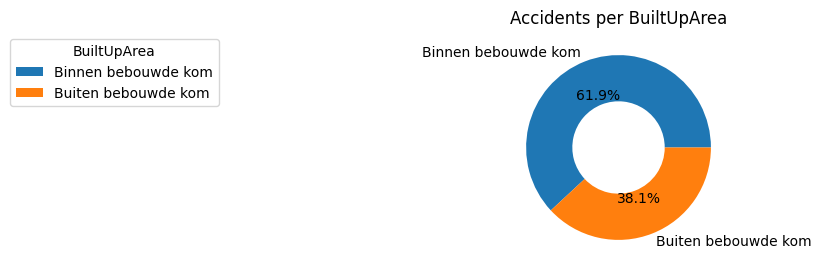

In [37]:
# Built up area analysis
fig,ax=plt.subplots(figsize=(12,3))
filter_df = df[df['BuiltUpArea']!='Niet beschikbaar']
accidents_per_builtup = filter_df.groupby('BuiltUpArea')[['Accident']].sum()
accidents_per_builtup = accidents_per_builtup.sort_values(by='Accident',ascending=False).reset_index()
ax.pie(accidents_per_builtup['Accident'], labels=accidents_per_builtup['BuiltUpArea'], 
       autopct='%1.1f%%', wedgeprops=dict(width=0.5))
ax.set_title('Accidents per BuiltUpArea')
plt.legend(title='BuiltUpArea',loc='upper right',bbox_to_anchor=(-1.2, 1))
plt.show()

"""sns.barplot(data=accidents_per_builtup, x='BuiltUpArea', y='Accident',hue='BuiltUpArea',legend=True)
for i in range(len(accidents_per_builtup)):
    plt.text(i, accidents_per_builtup['Accident'][i], accidents_per_builtup['Accident'][i], ha = 'center')
plt.title('Accidents per BuiltUpArea')
plt.xlabel('BuiltUpArea')
plt.ylabel('Number of Accidents')
plt.legend(title='BuiltUpArea',loc='upper right',bbox_to_anchor=(1.2, 1))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()"""

# Built up area analysis by municipality
accidents_per_builtup = filter_df.groupby(['Municipality','BuiltUpArea'])[['Accident']].sum()
accidents_per_builtup = accidents_per_builtup.reset_index()
accidents_per_builtup = accidents_per_builtup.sort_values(by='Accident',ascending=False)
accidents_per_builtup=accidents_per_builtup.head(20)
fig=px.bar(accidents_per_builtup, x='Municipality', y='Accident', title='Accidents per Municipality by BuiltUpArea',
         labels={'Municipality':'Municipality', 'Accident':'Number of Accidents'},
         color='BuiltUpArea',facet_col='BuiltUpArea')
fig.write_html('Accidents_per_Municipality_by_BuiltUpArea.html')
fig.show()

#Built up area analysis by municipality and year
accidents_per_builtup = filter_df.groupby(['Year','Municipality','BuiltUpArea'])[['Accident']].sum()
accidents_per_builtup = accidents_per_builtup.reset_index()
accidents_per_builtup = accidents_per_builtup.sort_values(by='Accident',ascending=False)
accidents_per_builtup=accidents_per_builtup.nlargest(50, 'Accident')
fig=px.bar(accidents_per_builtup, x='Municipality', y='Accident', title='Accidents per Municipality by BuiltUpArea and Year',
         labels={'Municipality':'Municipality', 'Accident':'Number of Accidents'},color='BuiltUpArea',facet_col='Year')
fig.write_html('Accidents_per_Municipality_by_BuiltUpArea_and_Year.html')
fig.show()

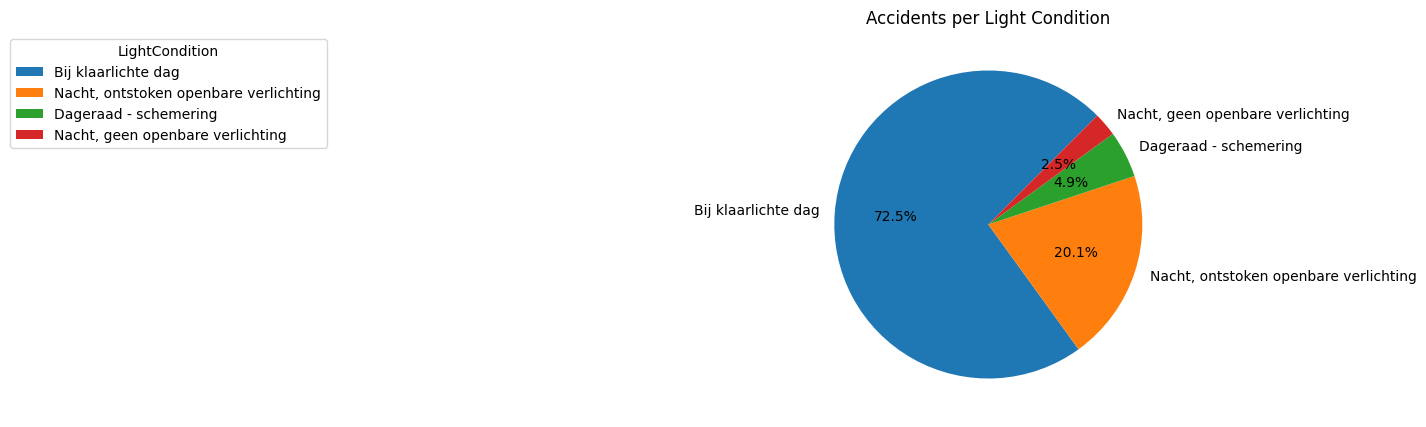

In [40]:
# Light condition analysis
fig,ax=plt.subplots(figsize=(12,5))
filter_df = df[df['LightCondition']!='Niet beschikbaar']
accidents_per_light = filter_df.groupby('LightCondition')[['Accident']].sum()
accidents_per_light = accidents_per_light.sort_values(by='Accident',ascending=False).reset_index()
ax.pie(accidents_per_light['Accident'], labels=accidents_per_light['LightCondition'], autopct='%1.1f%%', startangle=45)
ax.set_title('Accidents per Light Condition')
plt.legend(title='LightCondition',loc='upper right',bbox_to_anchor=(-1.2, 1))
plt.show()


"""sns.barplot(data=accidents_per_light, x='LightCondition', y='Accident',hue='LightCondition',legend=True)
for i in range(len(accidents_per_light)):
    plt.text(i, accidents_per_light['Accident'][i], accidents_per_light['Accident'][i], ha = 'center')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title('Accidents per Light Condition')
ax.set_xlabel('LightCondition')
ax.set_ylabel('Number of Accidents')
plt.show()
"""

# Light conditions analysis by district
accidents_per_light = filter_df.groupby(['District','LightCondition'])[['Accident']].sum()
accidents_per_light = accidents_per_light.reset_index()
accidents_per_light = accidents_per_light.sort_values(by='Accident',ascending=False)
accidents_per_light=accidents_per_light.head(20)
fig=px.bar(accidents_per_light, x='District', y='Accident', title='Accidents per District by LightCondition',
         labels={'District':'District', 'Accident':'Number of Accidents'},color='LightCondition')
fig.write_html('Accidents_per_District_by_LightCondition.html')
fig.show()



In [13]:
# Accident vs AccidentsWithFatalities in each province
accidents_per_province = df.groupby(['Province'])[['Accident','AccidentsWithFatalities']].sum()
accidents_per_province = accidents_per_province.reset_index()
accidents_per_province = accidents_per_province.sort_values(by='AccidentsWithFatalities',ascending=False)
#accidents_per_province=accidents_per_province.head(20)
fig=px.bar(accidents_per_province, x='Province', y='Accident', title='Accidents per Province by AccidentsWithFatalities',
            labels={'Province':'Province', 'Accident':'Number of Accidents'},color='AccidentsWithFatalities')
fig.write_html('Accidents_per_Province_by_AccidentsWithFatalities.html')
fig.show()






In [47]:
# Accident vs AccidentsWithSeriousInjuries
accidents_per_province = df.groupby(['Province','Year'])[['Accident','AccidentsWithSeriousInjuries']].sum()
accidents_per_province = accidents_per_province.reset_index()
accidents_per_province = accidents_per_province.sort_values(by='AccidentsWithSeriousInjuries',ascending=False)
#accidents_per_province=accidents_per_province.head(20)
fig=px.bar(accidents_per_province, x='Province', y='AccidentsWithSeriousInjuries', title='Province by AccidentsWithSeriousInjuriesdor diff years',
            labels={'Province':'Province', 'Accident':'Number of Accidents'},color='AccidentsWithSeriousInjuries',facet_col='Year')
fig.write_html('Accidents_per_Province_by_AccidentsWithSeriousInjuries.html')
fig.show()



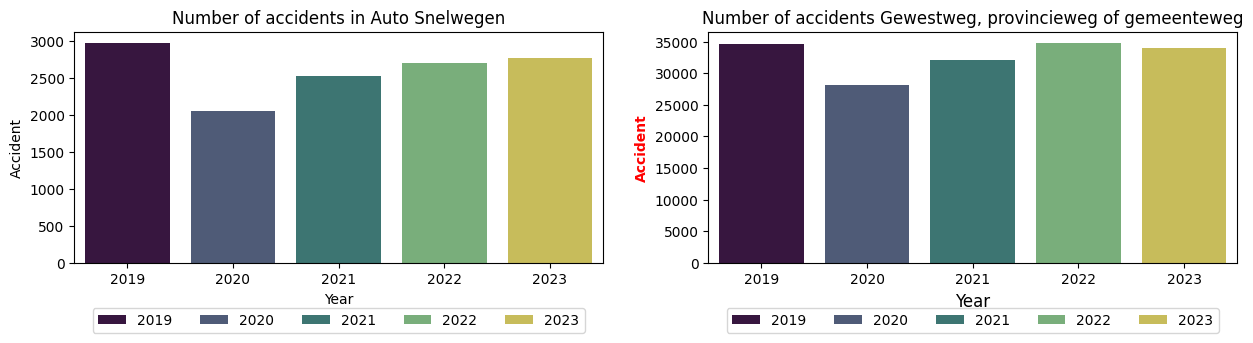

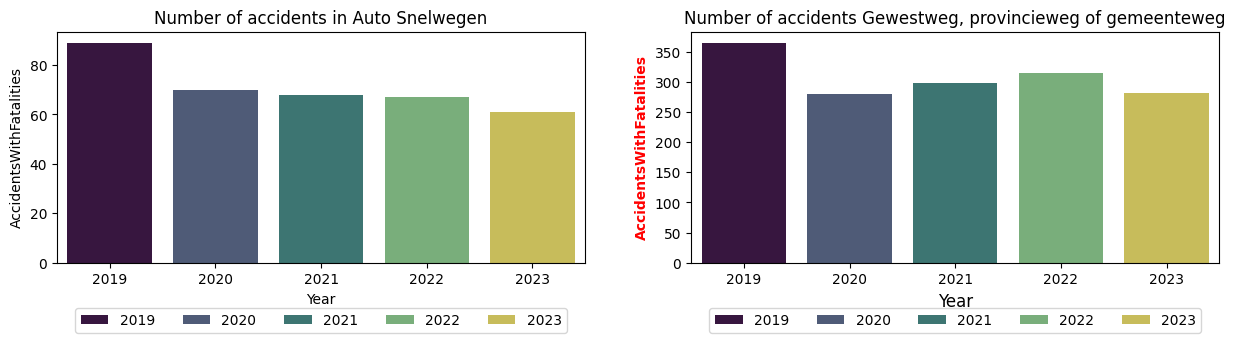

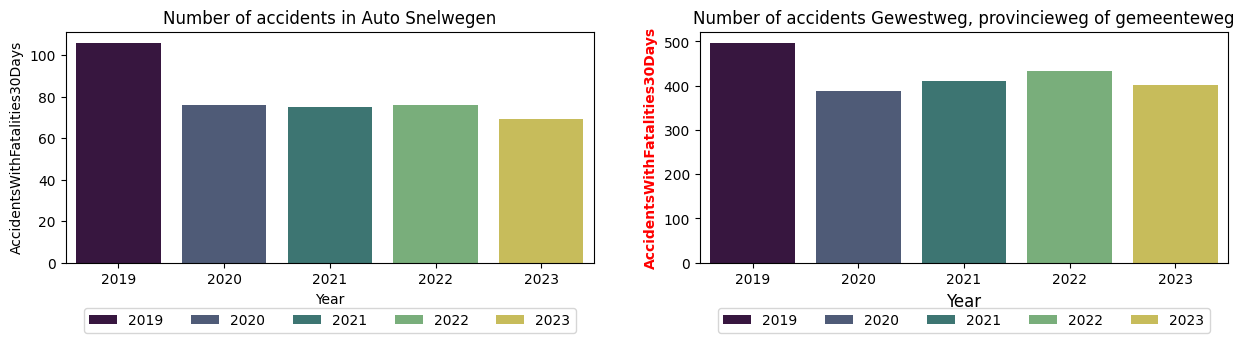

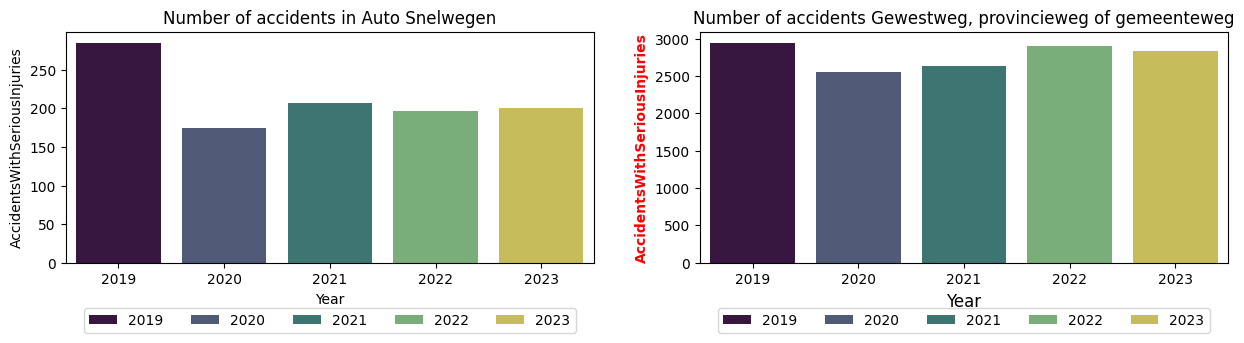

In [50]:
# Accidents in Auto Snelweg Vs Gewestweg..
columns=['Accident','AccidentsWithFatalities','AccidentsWithFatalities30Days','AccidentsWithSeriousInjuries']
accidents_auto_snelwegen = df[df['RoadType'] == 'Autosnelweg']
accidents_auto_snelwegen = accidents_auto_snelwegen.groupby('Year')[columns].sum()
accidents_autostrades = df[df['RoadType'] =='Gewestweg, provincieweg of gemeenteweg']
accidents_autostrades = accidents_autostrades.groupby('Year')[columns].sum()

for i in columns:
    fig, ax = plt.subplots(1, 2, figsize=(15, 3))
    sns.barplot(x=accidents_auto_snelwegen.index, y=accidents_auto_snelwegen[i], saturation=0.50,ax=ax[0],
                hue=accidents_auto_snelwegen.index,palette='viridis')   
    ax[0].set_title('Number of accidents in Auto Snelwegen')
    plt.ylabel(i, fontsize=10)
    plt.xlabel('Year', fontsize=12)
    ax[0].legend(loc='center', bbox_to_anchor=(0.5, -0.25), ncol=5)
    sns.barplot(x=accidents_autostrades.index, y=accidents_autostrades[i], palette='viridis', saturation=0.50,hue=accidents_autostrades.index,ax=ax[1])
    ax[1].set_title('Number of accidents Gewestweg, provincieweg of gemeenteweg')
    plt.ylabel(i, fontsize=10, color='red', fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    ax[1].legend(loc='center', bbox_to_anchor=(0.5, -0.25), ncol=5)
    plt.show()